This notebook shows the scoring metrics working on the toy dataset after the split with the popular recommender

In [61]:
from hmcollab import datasets
from hmcollab import articles
from hmcollab import models
from hmcollab import scoring
from hmcollab.directory_tree import HMDatasetDirectoryTree
from hmcollab import directories
from display_data import display_articles

In [62]:
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")

### Toy dataset

In [63]:
toy_tree = HMDatasetDirectoryTree(directories.data("toy"))
toy = datasets.HMDataset(tree=toy_tree, folds="twosets")
print('Transactions shape: ', toy.transactions.shape)
print('Unique customers: ',toy.transactions.customer_id.unique().shape)

Transactions shape:  (630673, 5)
Unique customers:  (10000,)


In [64]:
print(toy.__dict__.keys())

dict_keys(['tree', 'articles', 'customers', 'transactions', 'transactions_x', 'transactions_y', 'relevant_set', 'train_x', 'test_x', 'train_y', 'test_y'])


In [65]:
print('train_x shape: ', toy.train_x.shape)
print('train_y shape: ', toy.train_y.shape)
print('test_x shape: ', toy.test_x.shape)
print('test_y shape: ', toy.test_y.shape)

train_x shape:  (475677, 5)
train_y shape:  (28418, 5)
test_x shape:  (119609, 5)
test_y shape:  (6969, 5)


In [66]:
toy_target = datasets.Target(toy.transactions)
print('x: ', toy_target.transactions_x.shape)
print('y: ', toy_target.transactions_y.shape)
print('Relevant: ', toy_target.relevant_set.shape)

x:  (595286, 5)
y:  (35387, 5)
Relevant:  (10000, 2)


### Popular Recommender

In [67]:
# Here we use train_x within the class
recommender = models.PopularRecommender(toy, total_recommendations=12,)

In [68]:
full_12 = recommender.recommend()
full_12

['0706016001',
 '0706016002',
 '0759871002',
 '0610776002',
 '0372860001',
 '0399223001',
 '0751471001',
 '0448509014',
 '0464297007',
 '0610776001',
 '0399256001',
 '0562245001']

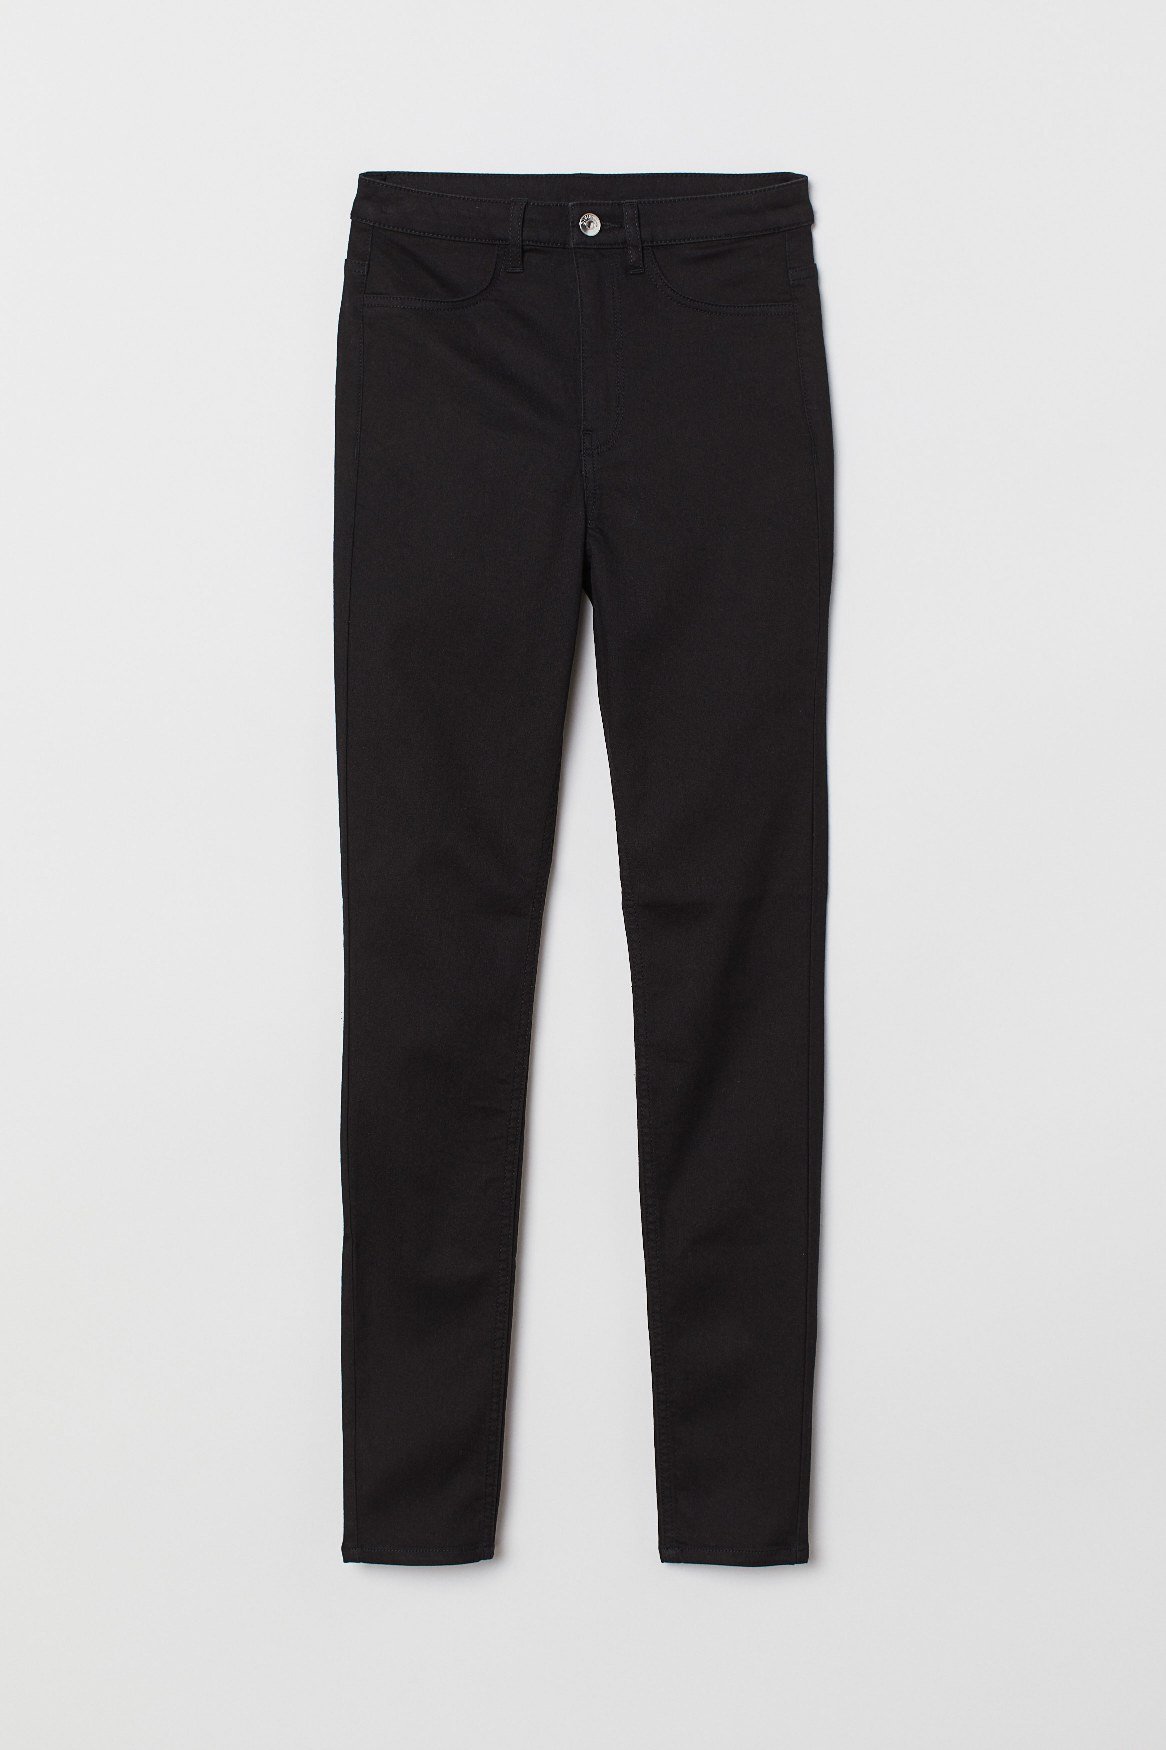

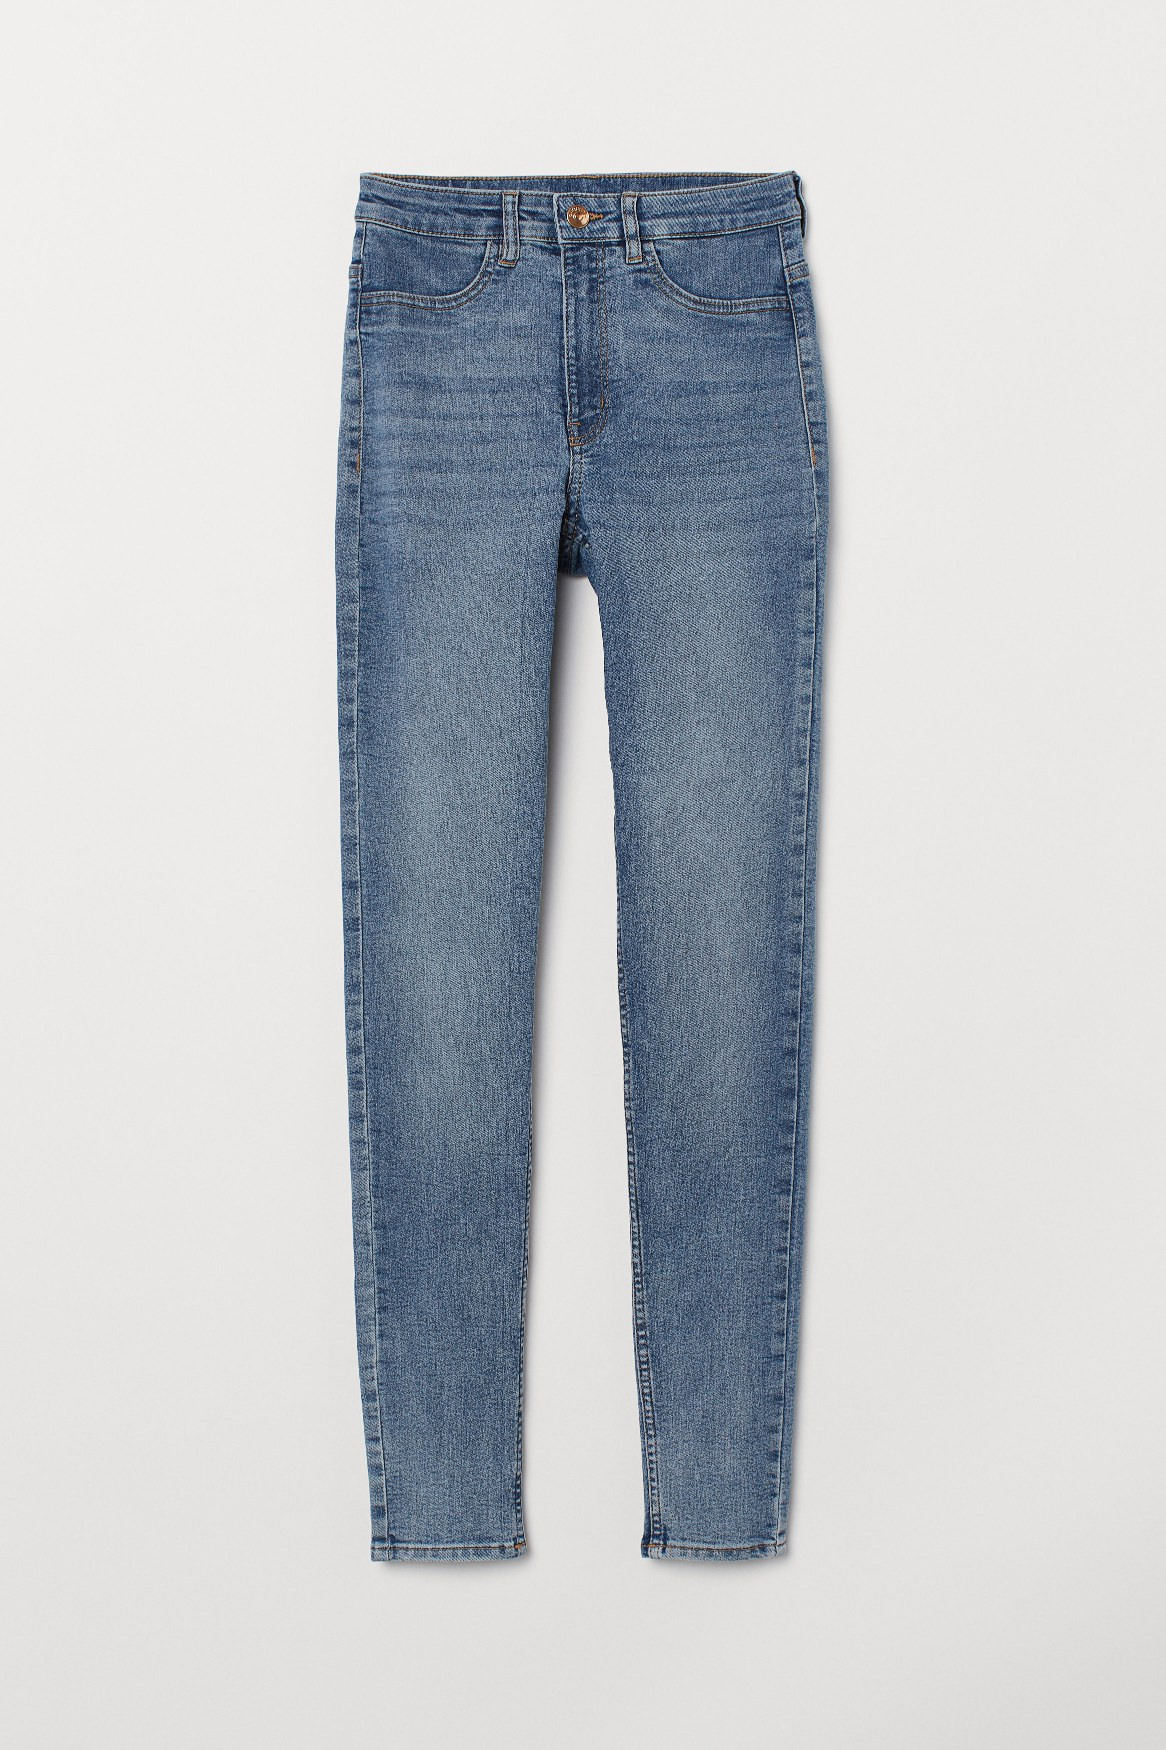

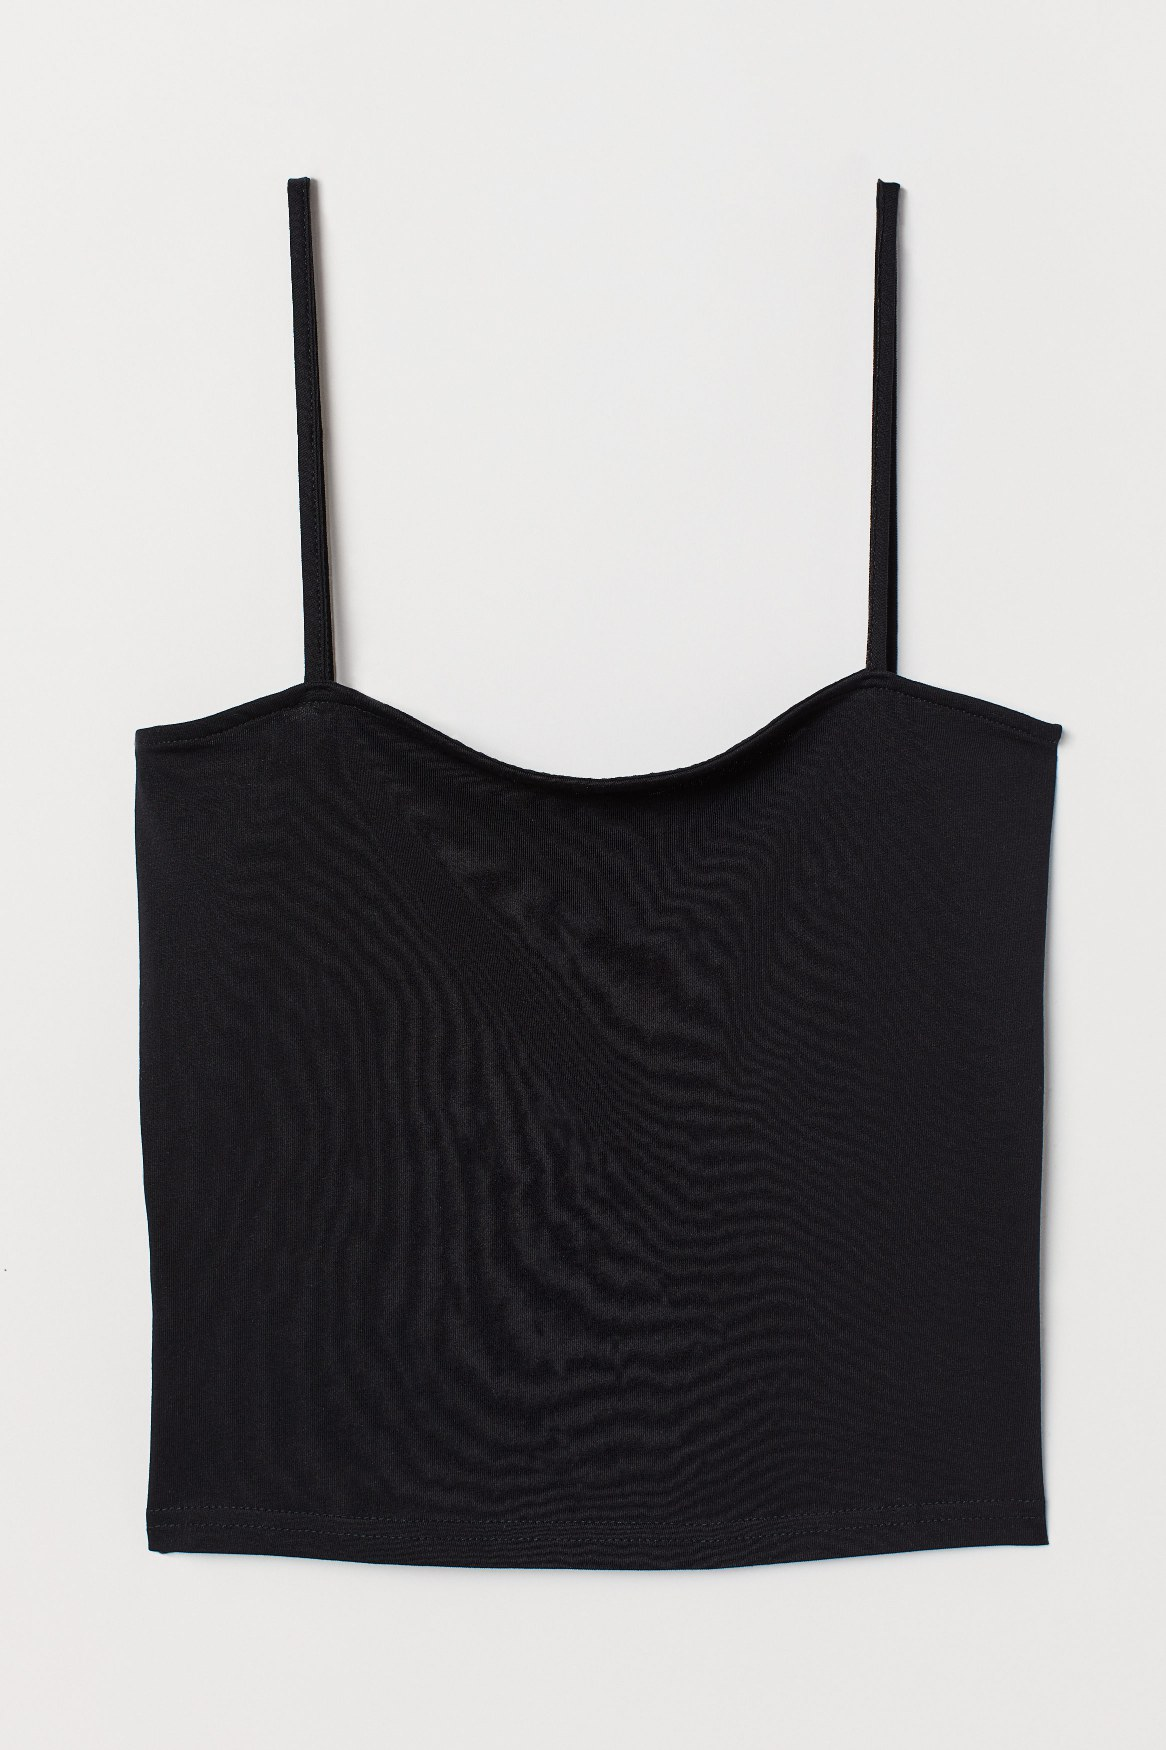

/Users/gina/Desktop/Gina/MachineLearning/Proyectos/HM/HM-clothing-project/data/images/061/0610776002.jpg does not exist


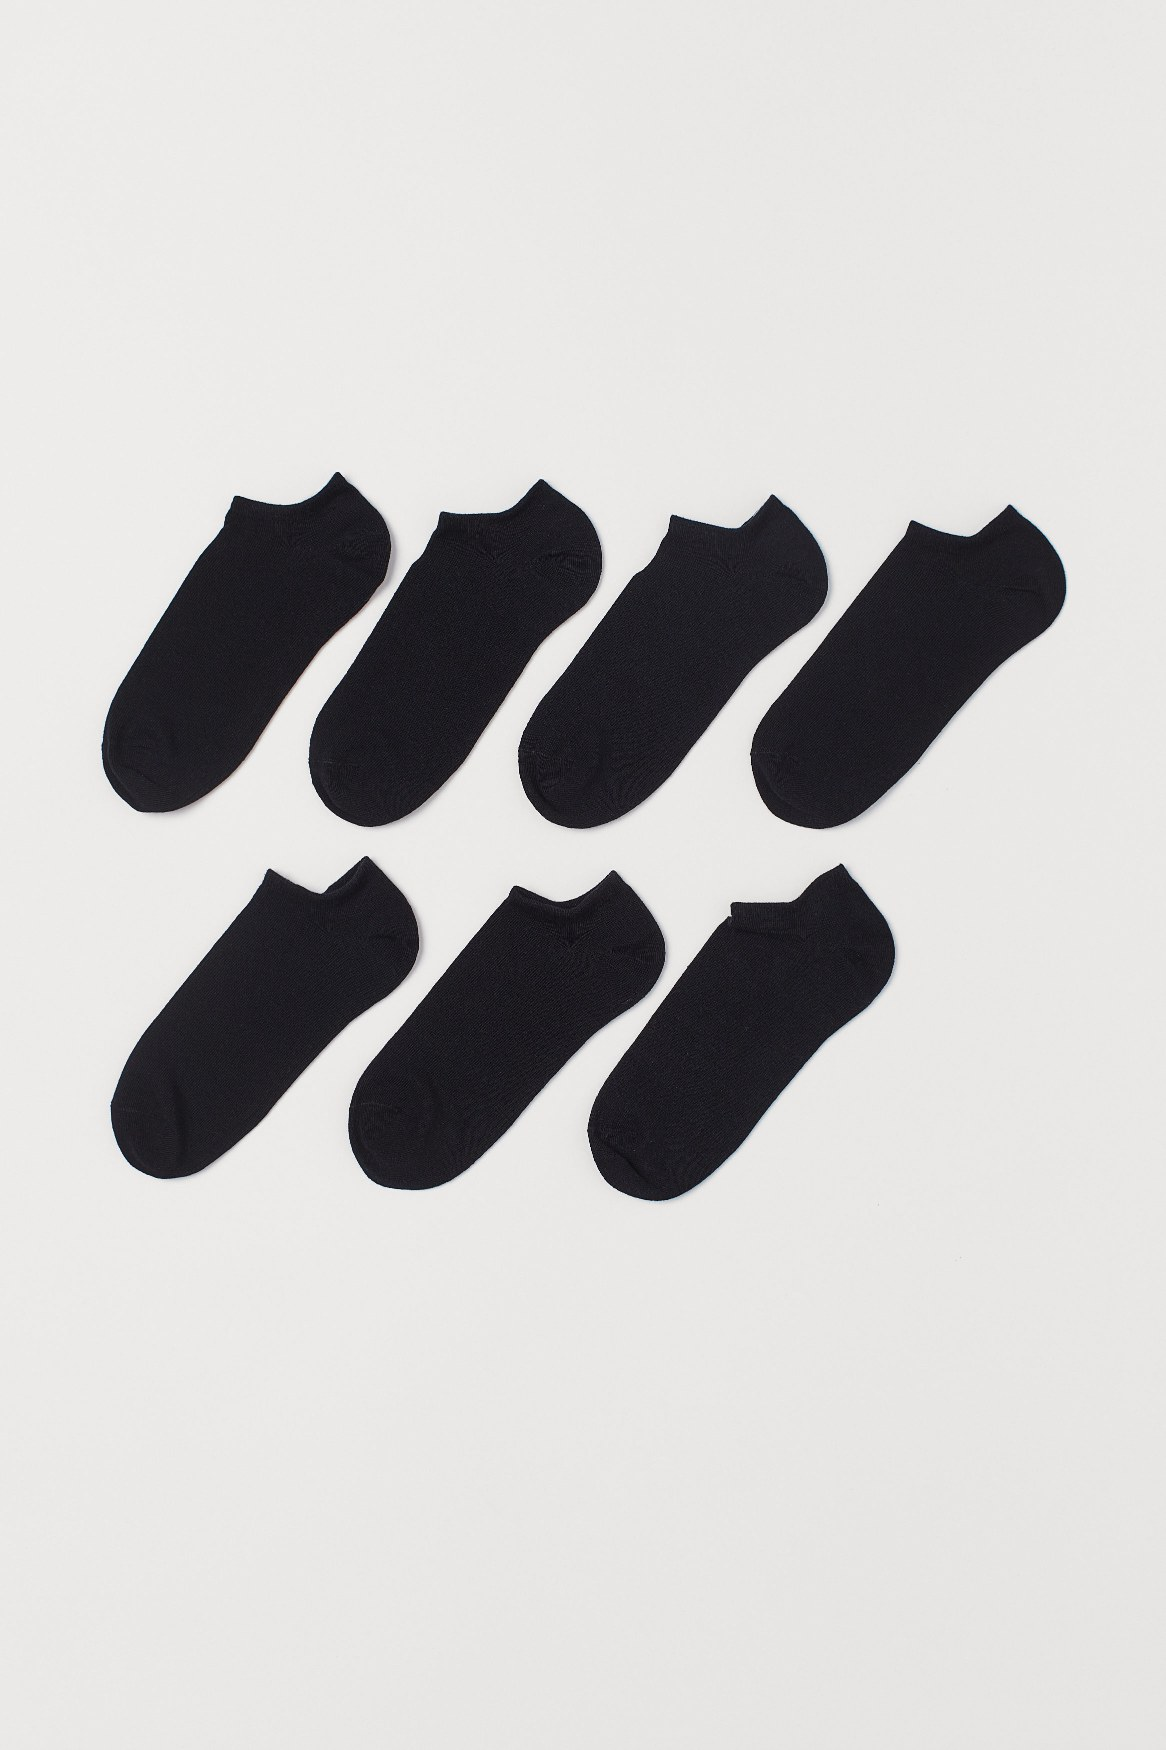

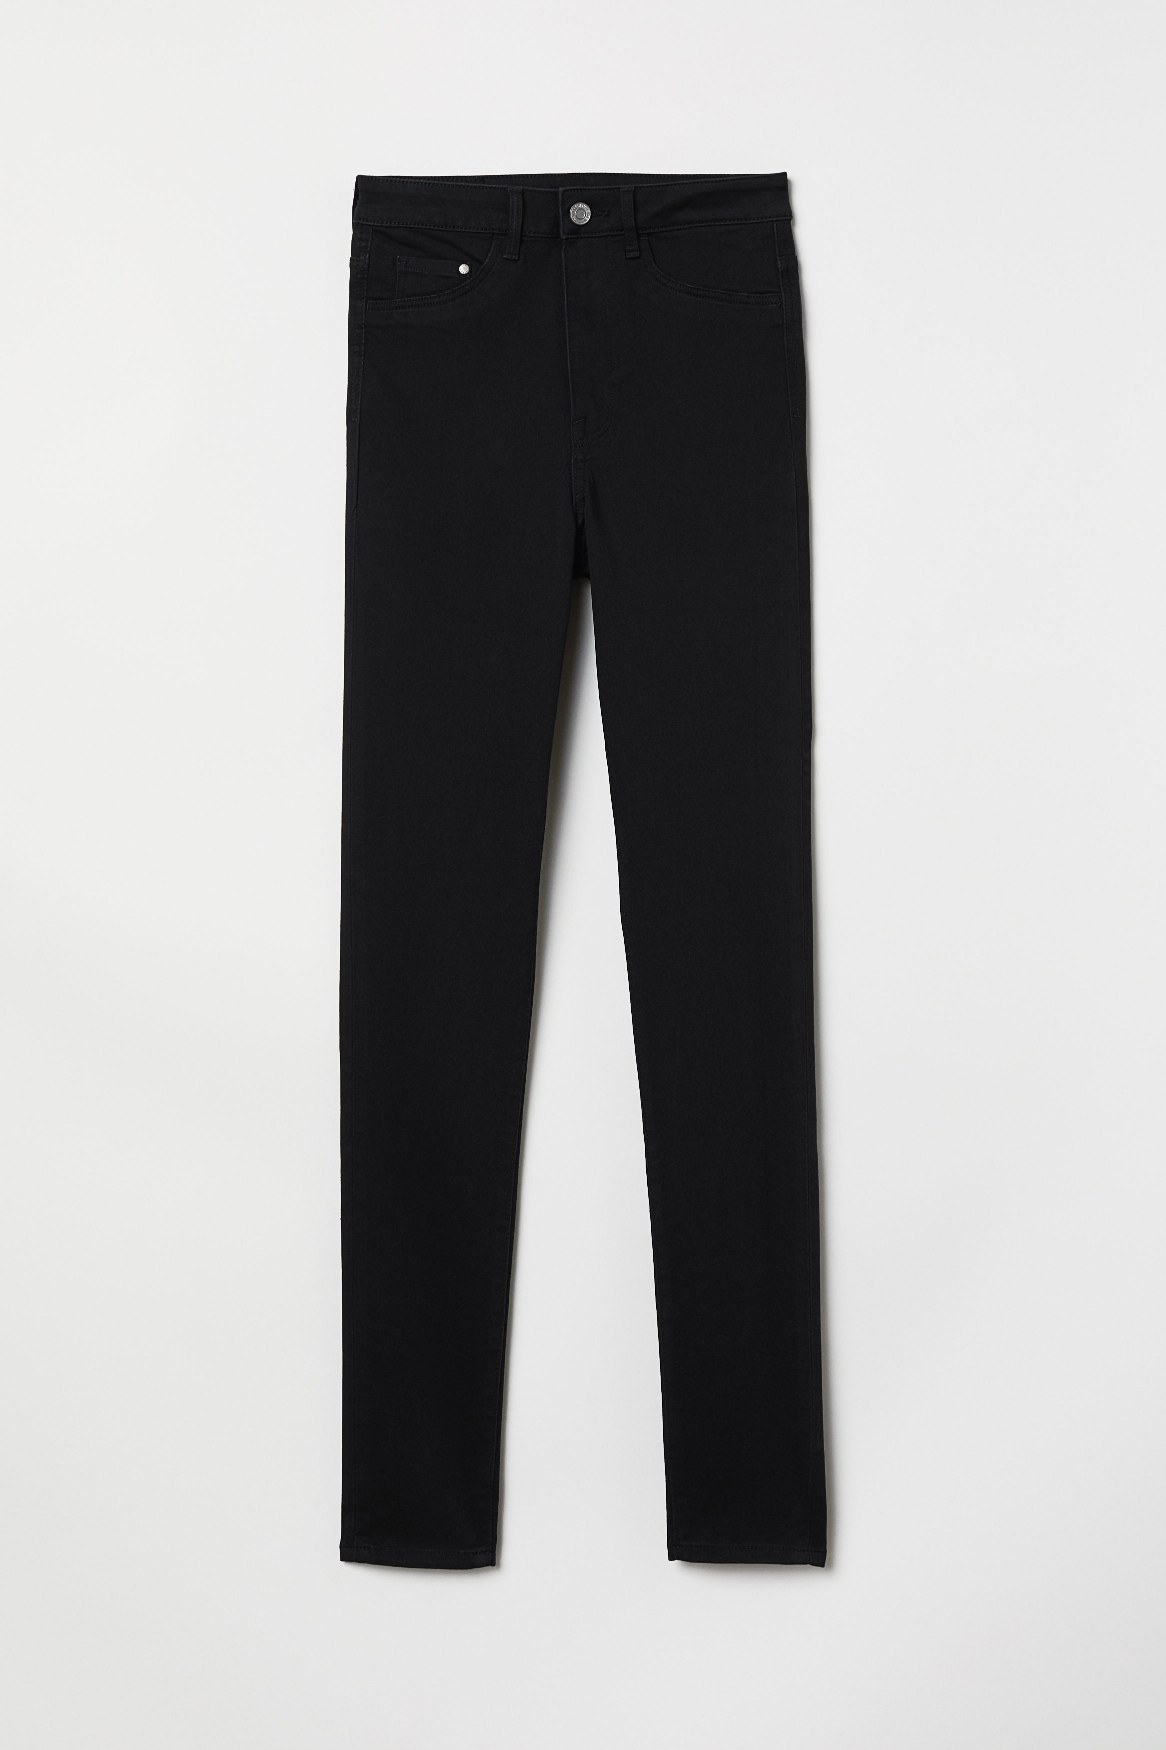

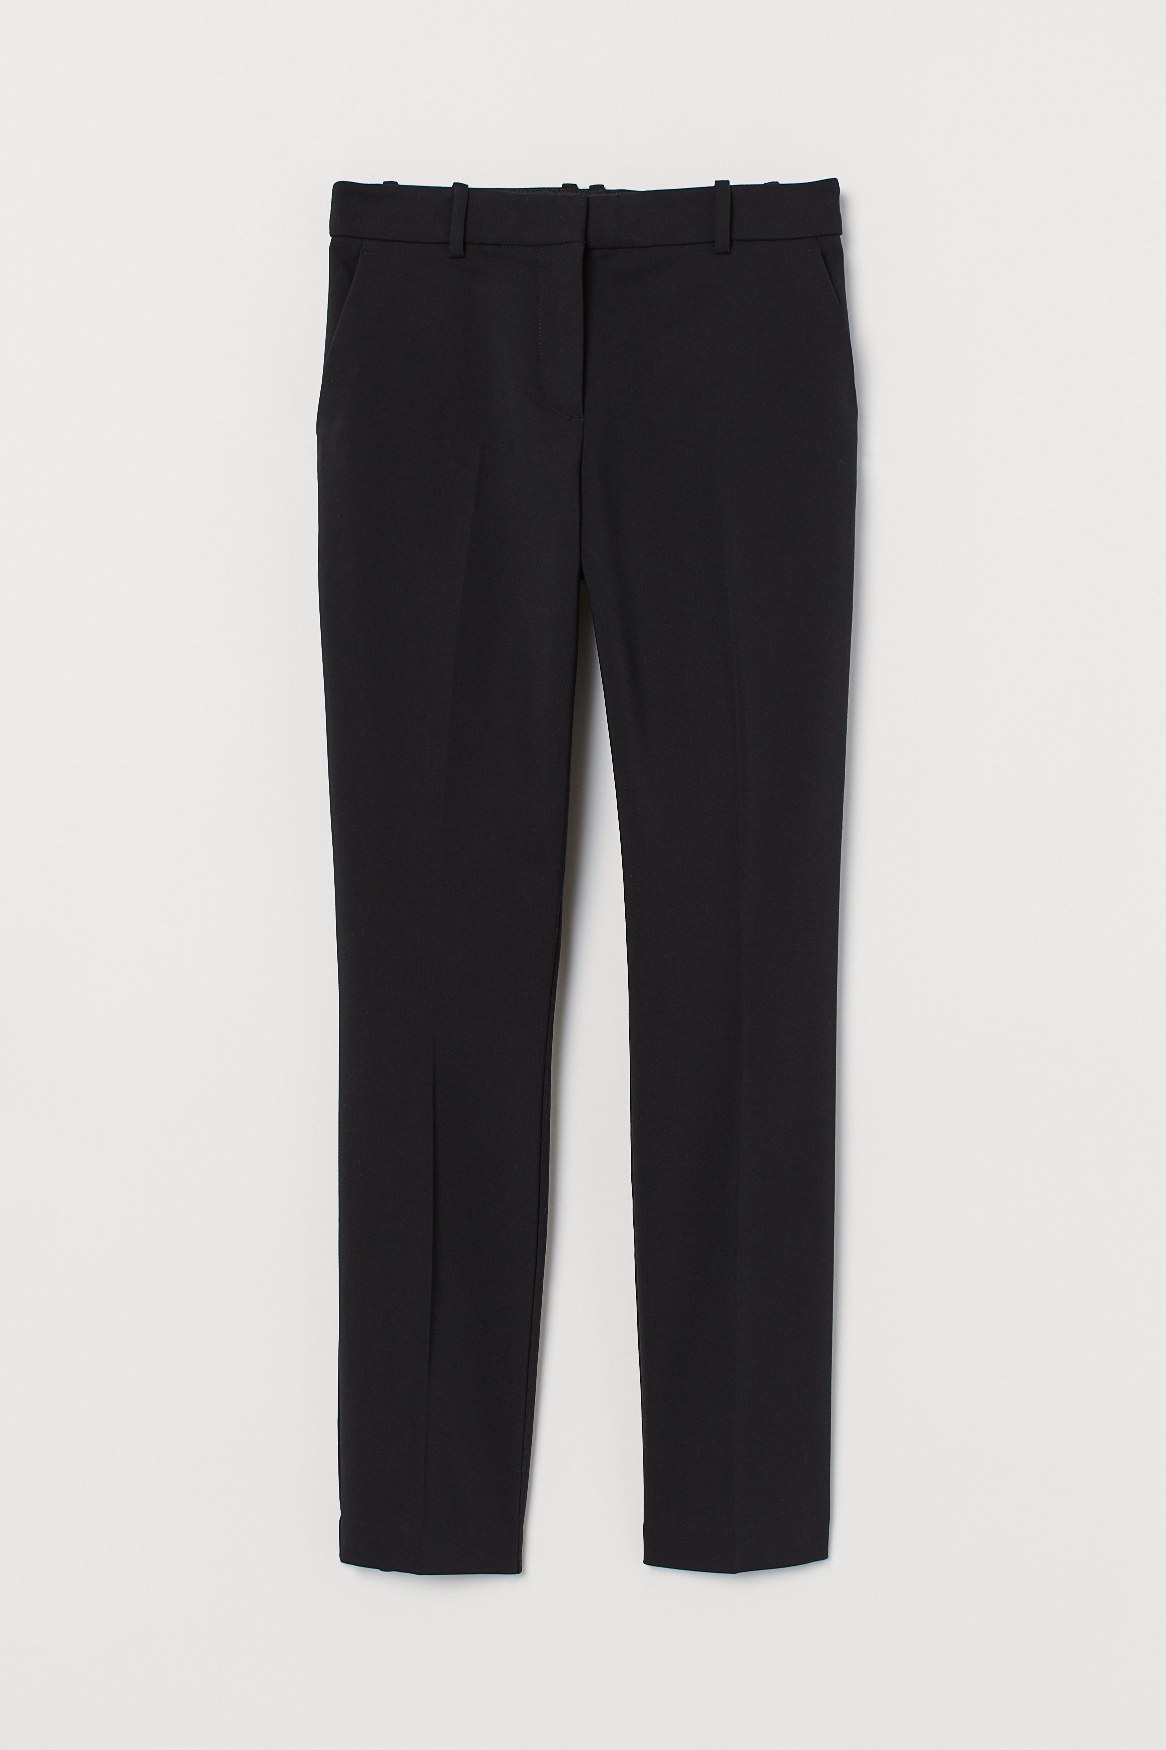

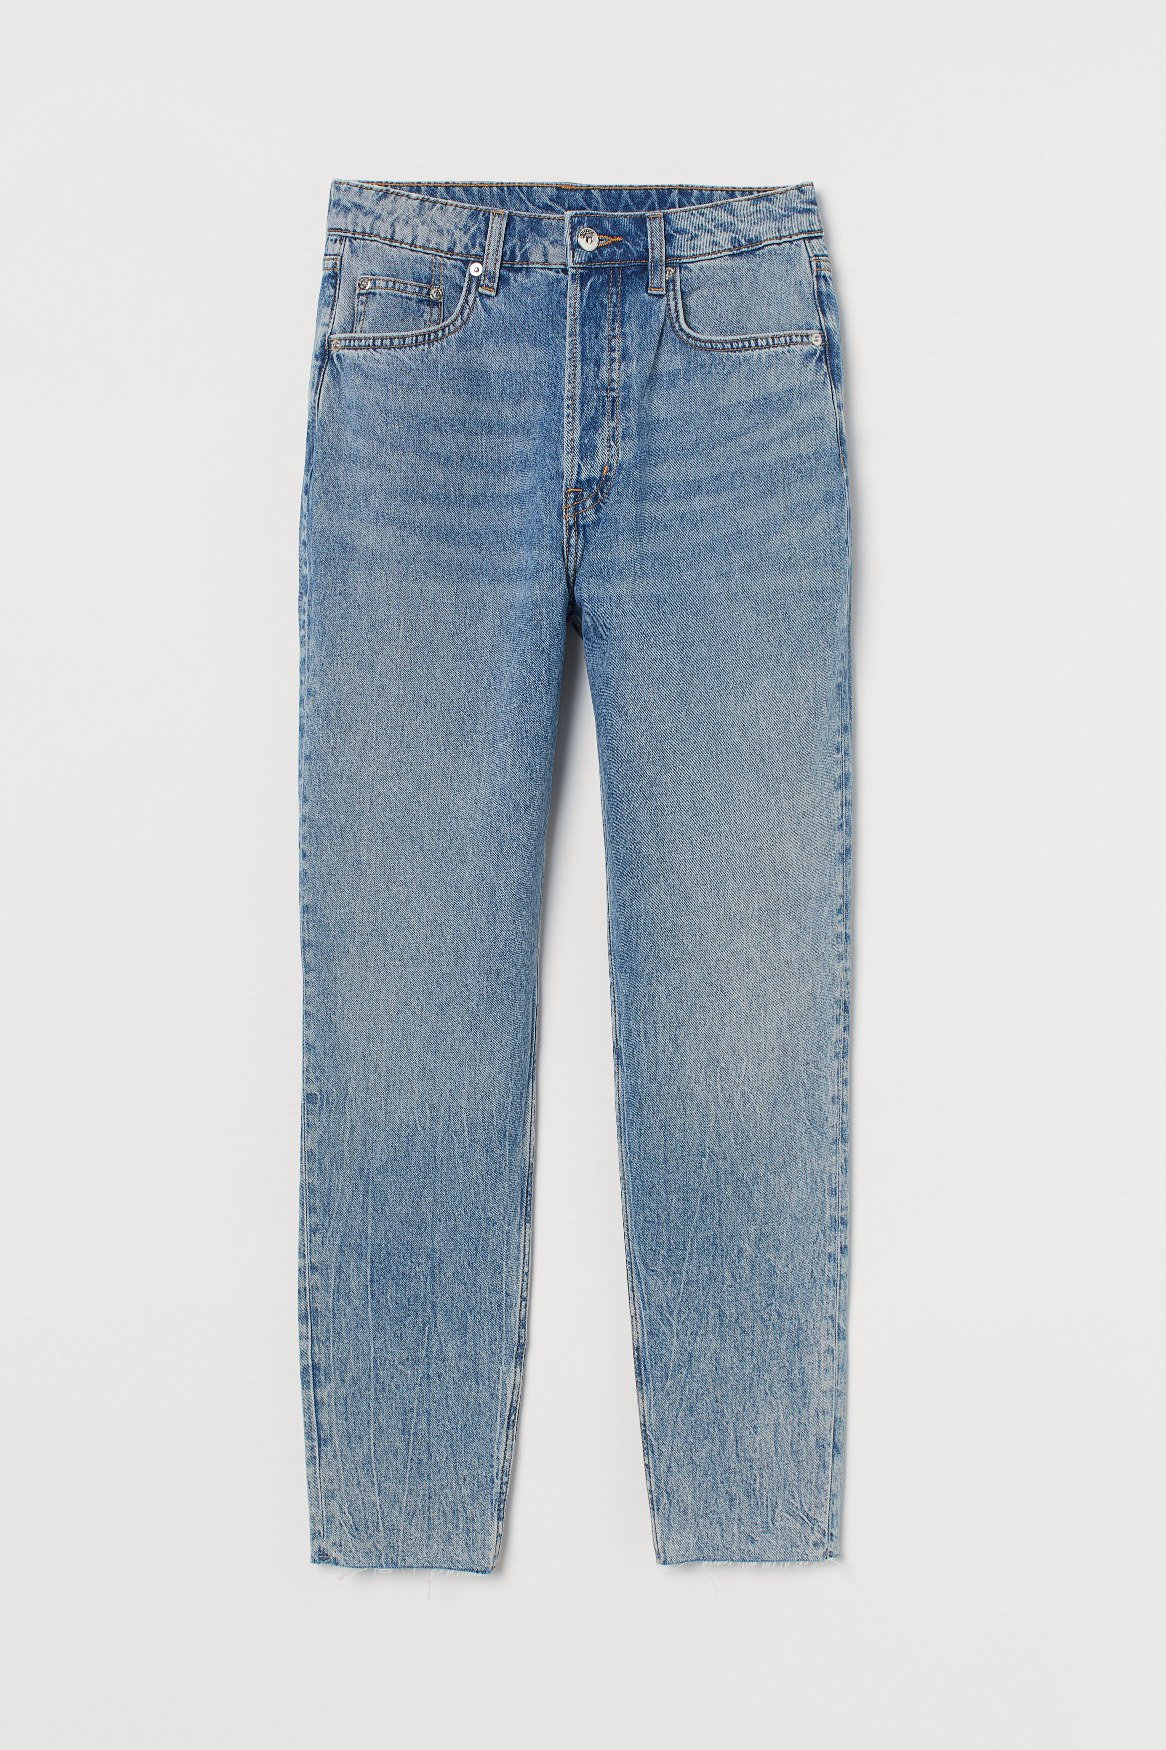

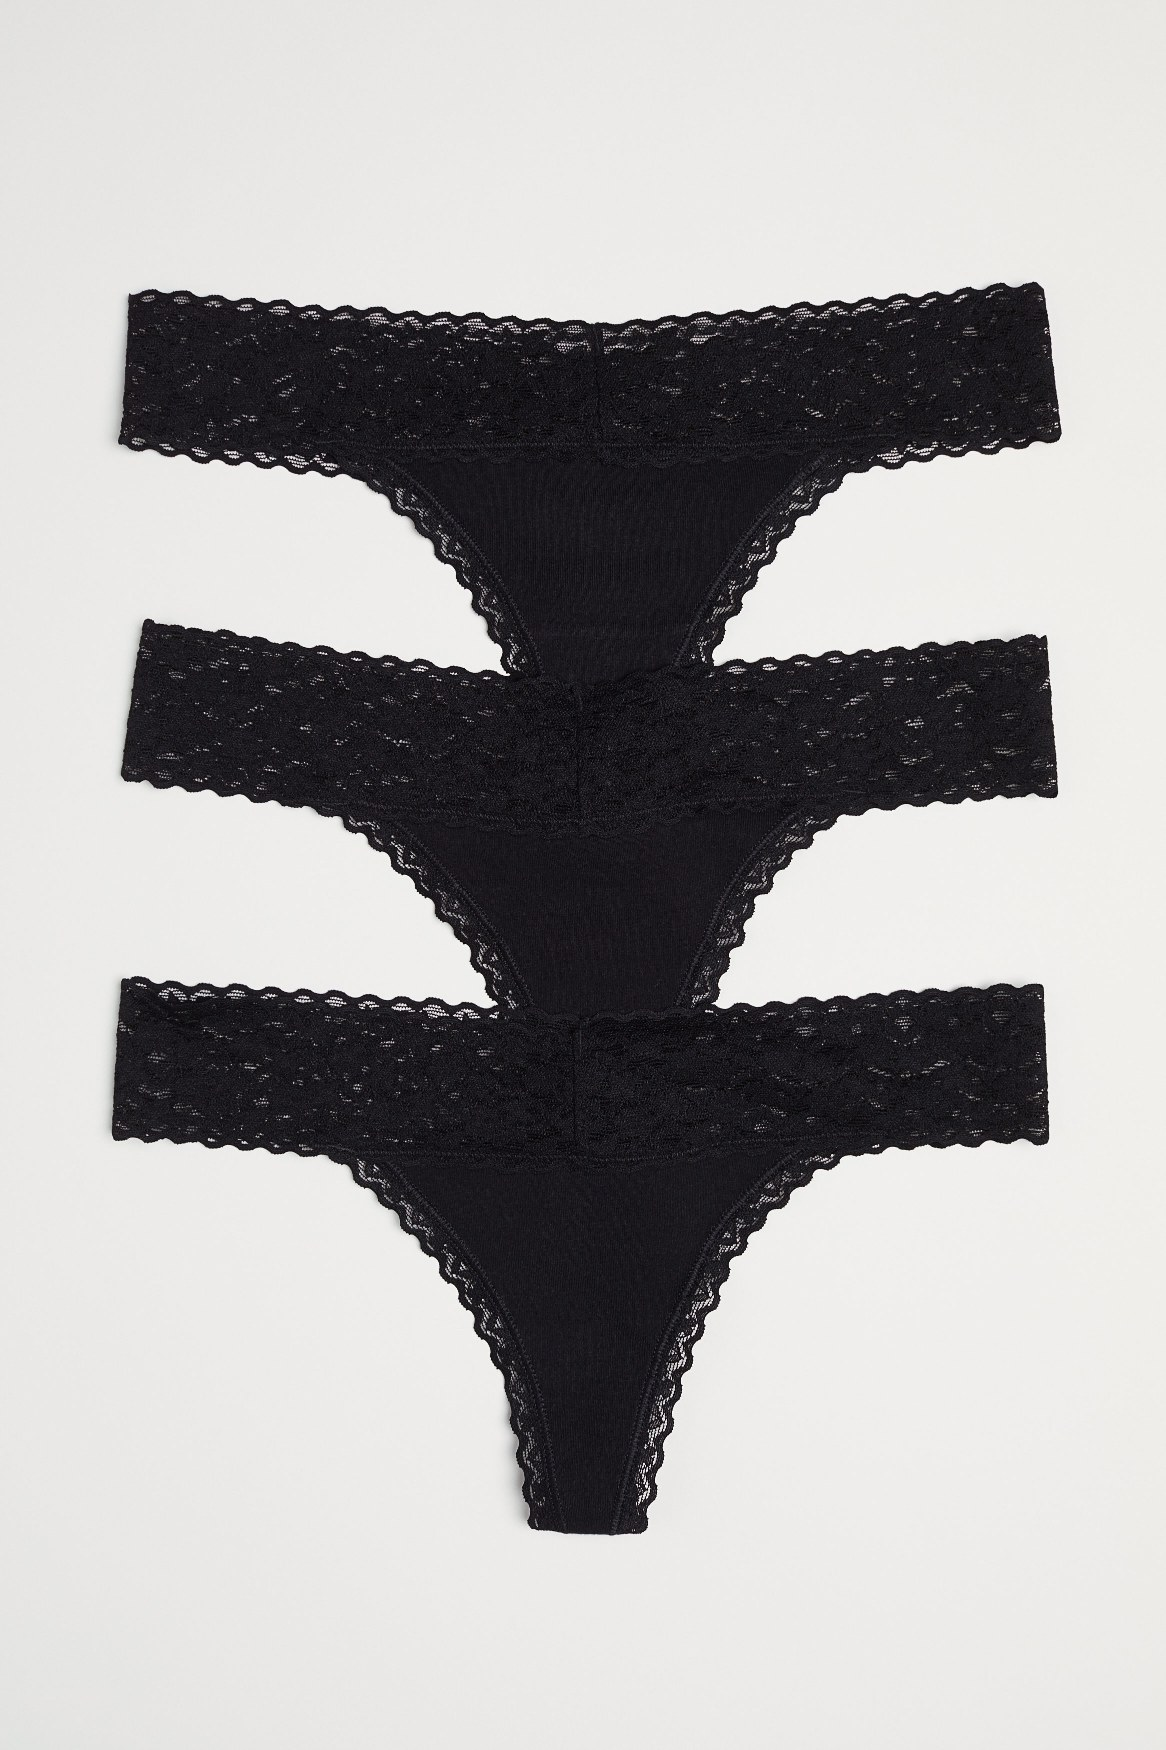

/Users/gina/Desktop/Gina/MachineLearning/Proyectos/HM/HM-clothing-project/data/images/061/0610776001.jpg does not exist


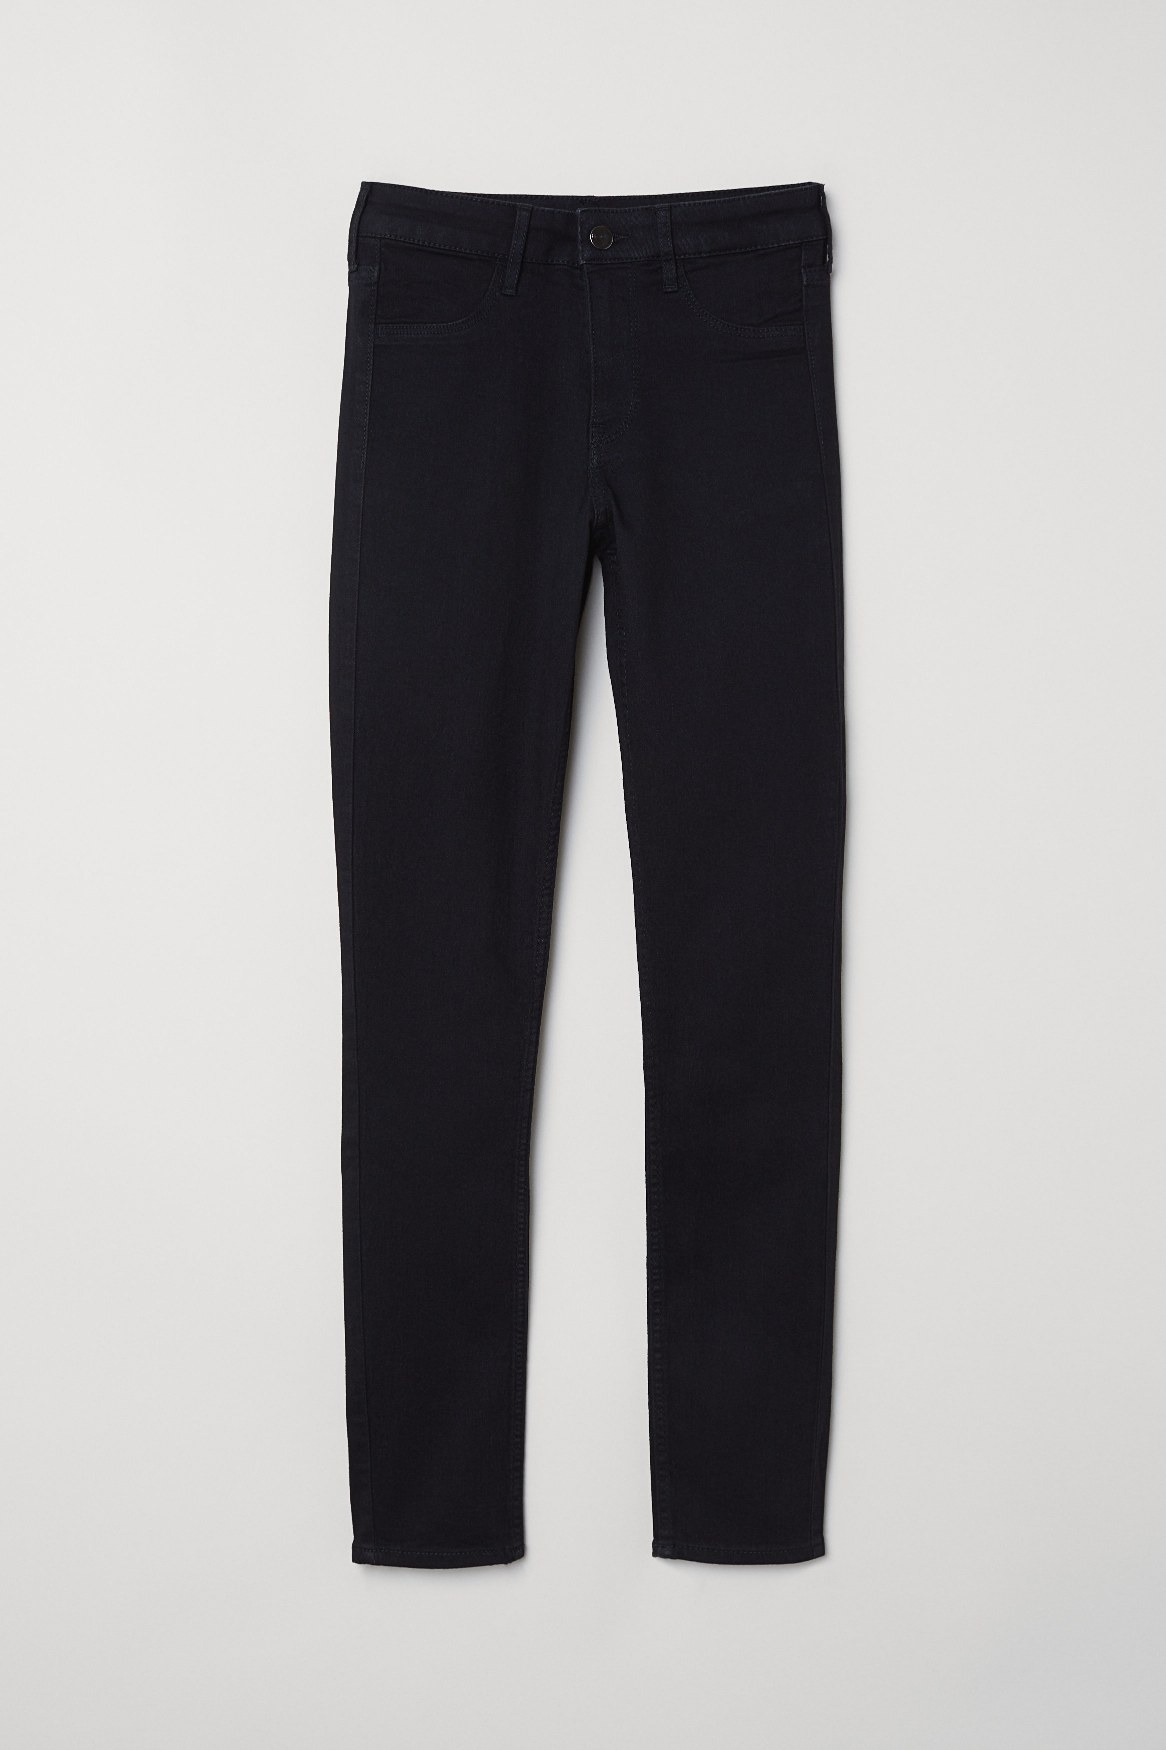

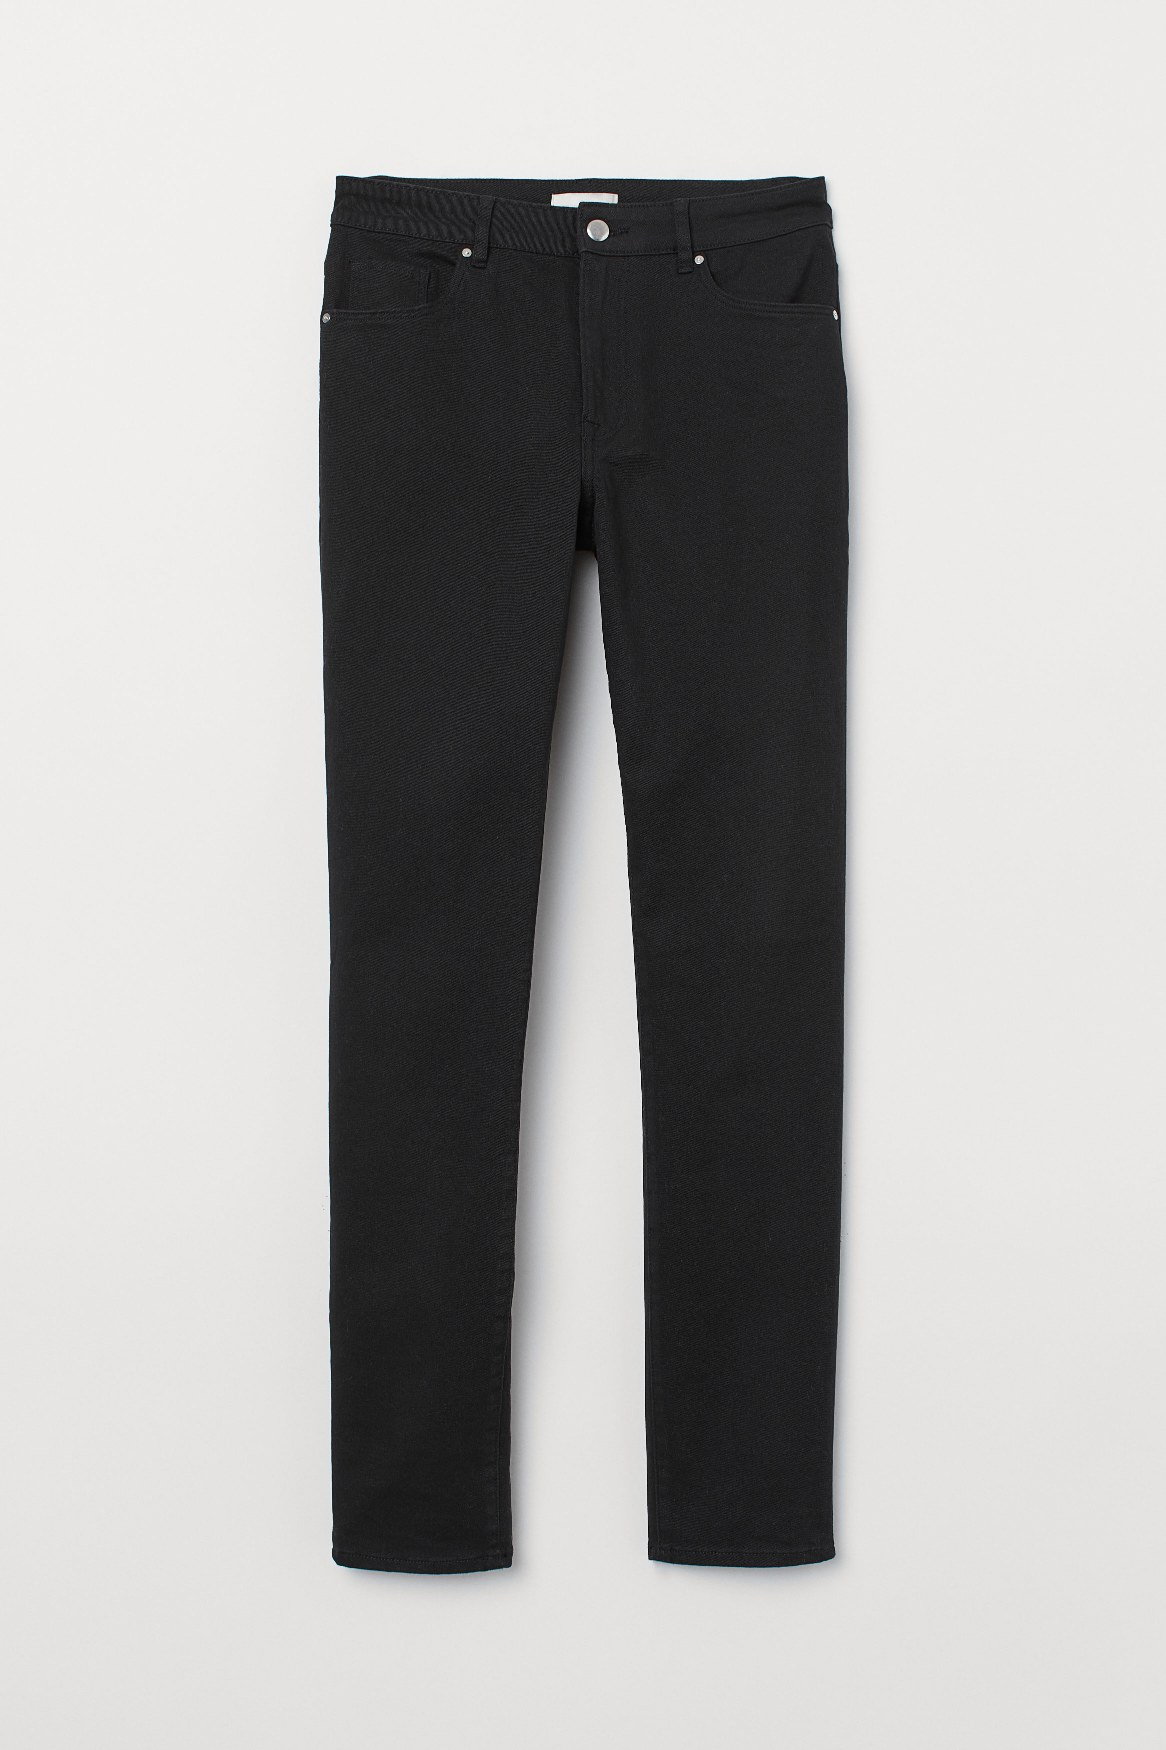

In [69]:
# GG sep20,2023, we need to prune the images!
display_articles(toy, full_12)  

In [70]:
print('toy.train_x unique customers: ', toy.train_x.customer_id.unique().shape[0])
train_recommended = recommender.recommend_all(toy.train_x.customer_id.unique())
train_recommended.head()

toy.train_x unique customers:  7350


,customer_id,prediction
0,01959be607170cc2f092ee8fd13eda251b13cde70ef38d...,0706016001 0706016002 0759871002 0610776002 03...
1,02d796ea767fa2e94fc6228fe70d8af1a570da973c32f7...,0706016001 0706016002 0759871002 0610776002 03...
2,03fe6234ee5446aacaf41c77be890197f5c40ab1c14195...,0706016001 0706016002 0759871002 0610776002 03...
3,04573d1d88236664b9c68bd2e4e163467b53bea966bbd4...,0706016001 0706016002 0759871002 0610776002 03...
4,05a7beb1c0c6615415a2817654bc29c6a37f7e004bb20f...,0706016001 0706016002 0759871002 0610776002 03...


In [71]:
toy_bool = scoring.relevant(train_recommended, toy_target.relevant_set)
toy_bool.head()

0    [False, False, False, False, False, False, Fal...
1    [False, False, False, False, False, False, Fal...
2    [False, False, False, False, False, False, Fal...
3    [False, False, False, False, False, False, Fal...
4    [False, False, False, False, False, False, Fal...
dtype: object

In [72]:
print('precision at {} for the first customer: {}'.format(len(toy_bool[0]), scoring.precision_at_k(toy_bool[0][: len(toy_bool[0]) + 1])))
print('ap_at_k for the first customer:', scoring.ap_at_k(toy_bool[0]))
print('map_at_k:', scoring.map_at_k(toy_bool))

precision at 12 for the first customer: 0.0
ap_at_k for the first customer: 0.0
map_at_k: 0.0007678980442585885
